# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [111]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [112]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [113]:
print(f"number of data: {X.shape[0]}")

number of data: 150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [114]:
# your code
print(f"type of data: {type(X)}")
print(f"dimension of data: {X.shape}")

type of data: <class 'numpy.ndarray'>
dimension of data: (150, 4)


**Question 3:** How many classes ? How many samples per class ?

In [115]:
# your code
print(f"number of classes: {np.unique(y).shape[0]}")
print(f"number of samples per class: {np.unique(y, return_counts=True)[1]}")

number of classes: 3
number of samples per class: [50 50 50]


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

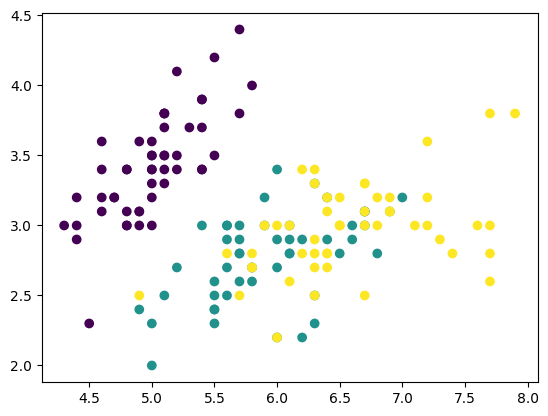

In [116]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

accuracy of the perfect classification 1.0
recall: [1. 1. 1.]
F1-measures: [1. 1. 1.]
confusion matrix: [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


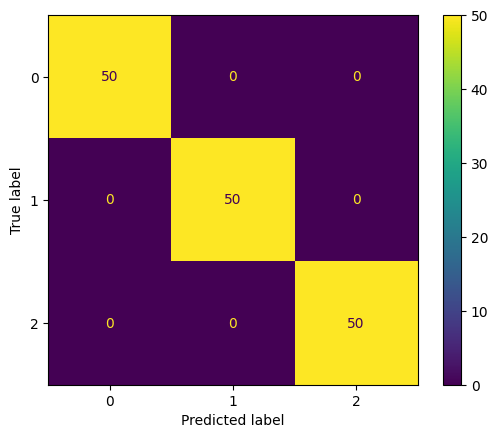

In [117]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# here is an example for accuracy: 
print("accuracy of the perfect classification", accuracy_score(y, y))

# plot also the recall, F1-measures, confusion matrix
print(f"recall: {recall_score(y, y, average=None)}")
print(f"F1-measures: {f1_score(y, y, average=None)}")
print(f"confusion matrix: {confusion_matrix(y, y)}")
ConfusionMatrixDisplay(confusion_matrix(y, y)).plot()

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

accuracy of the random classification: 0.32666666666666666
recall: [0.28 0.38 0.32]
F1-measures: [0.30434783 0.35849057 0.31372549]
confusion matrix: [[14 21 15]
 [10 19 21]
 [18 16 16]]


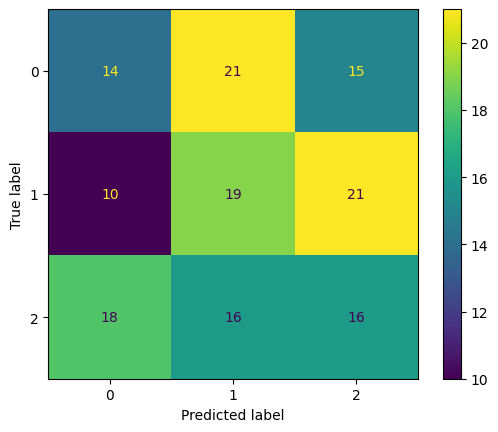

In [118]:
random_labels = np.random.randint(0, 3, y.shape[0])
print(f"accuracy of the random classification: {accuracy_score(y, random_labels)}")
print(f"recall: {recall_score(y, random_labels, average=None)}")
print(f"F1-measures: {f1_score(y, random_labels, average=None)}")
print(f"confusion matrix: {confusion_matrix(y, random_labels)}")
ConfusionMatrixDisplay(confusion_matrix(y, random_labels)).plot()

### binary classification

In [119]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]

XBinaire =  X
yBinaire = y


In [120]:
# split into train and test datasets
from sklearn.model_selection import train_test_split

XBinaire = XBinaire[:, :2]

X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

accuracy of the linear classifier: 0.85
recall: [1.         0.7        0.85714286]
F1-measures: [0.97435897 0.75675676 0.81818182]
confusion matrix: [[19  0  0]
 [ 1 14  5]
 [ 0  3 18]]


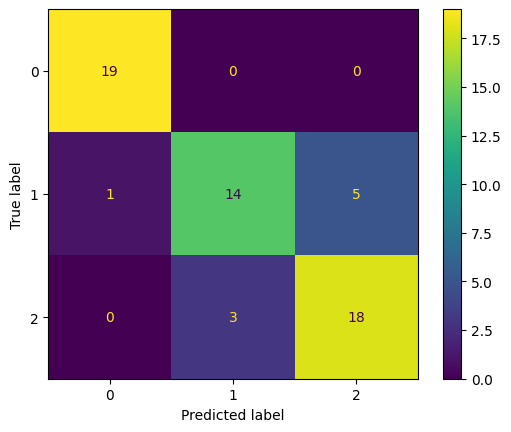

In [121]:
# linear classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy of the linear classifier: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred, average=None)}")
print(f"F1-measures: {f1_score(y_test, y_pred, average=None)}")
print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

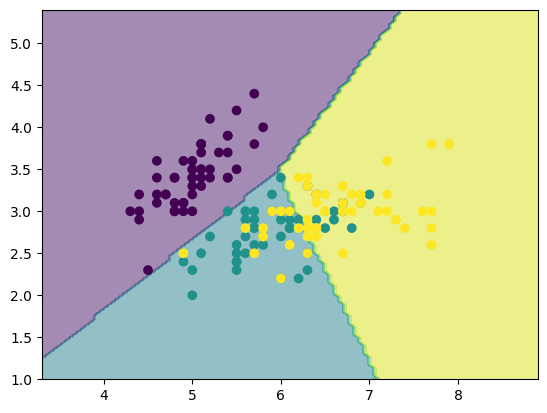

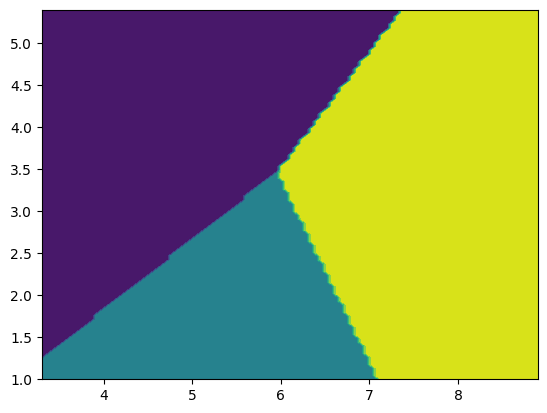

In [122]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(clf, XBinaire, response_method="predict", alpha=0.5)
display.ax_.scatter(XBinaire[:, 0], XBinaire[:, 1], c=yBinaire)
display.plot()

**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

In [80]:
#Probably not as the dataset is not linearly separable as seen on the plot in question 4

## dataset: digit

In [124]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

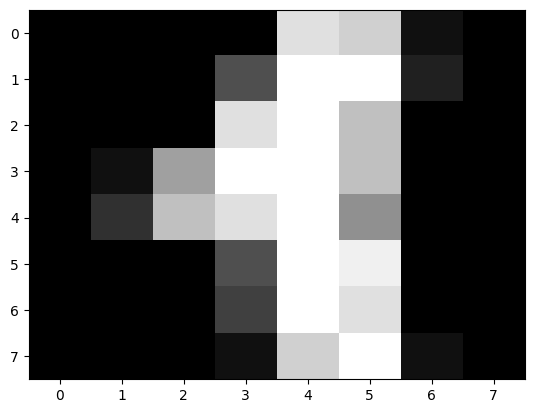

class =  1


In [125]:
#display one of the pictures (the 22nd in this code)
import matplotlib.pyplot as plt
i = 11 #index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

In [126]:
print(f"number of data: {X.shape[0]}")

number of data: 1797


In [127]:
print(f"type of data: {type(X)}")

type of data: <class 'numpy.ndarray'>


In [128]:
print(f"dimension of data: {X.shape}")

dimension of data: (1797, 64)


In [129]:
print(f"number of classes: {np.unique(y).shape[0]}")

number of classes: 10


In [130]:
print(f"number of samples per class: {np.unique(y, return_counts=True)[1]}")

number of samples per class: [178 182 177 183 181 182 181 179 174 180]


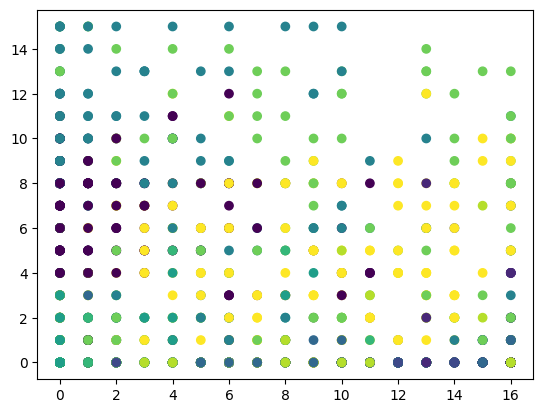

In [133]:
plt.scatter(X[:,20], X[:,30], c=y)

accuracy of the linear classifier: 0.9749652294853964
recall: [0.9625     1.         0.96       0.93243243 0.984375   1.
 1.         0.98734177 0.9516129  0.96774194]
F1-measures: [0.98089172 0.97402597 0.97959184 0.95172414 0.99212598 0.95652174
 1.         0.99363057 0.944      0.96774194]
confusion matrix: [[77  0  0  0  0  3  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  1 72  2  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  2  2]
 [ 0  1  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 82  0  0  0]
 [ 0  0  0  0  0  0  0 78  1  0]
 [ 0  2  0  0  0  1  0  0 59  0]
 [ 0  0  0  0  0  1  0  0  1 60]]


/Users/ozeliurs/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


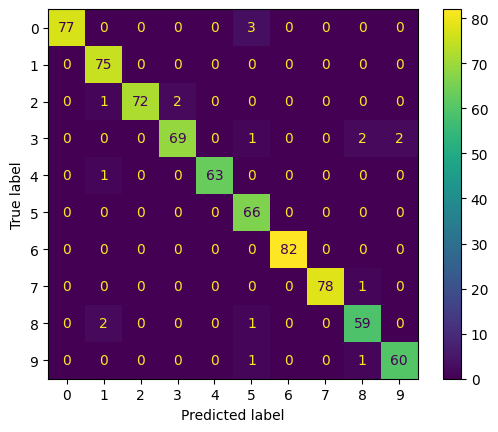

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# linear classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy of the linear classifier: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred, average=None)}")
print(f"F1-measures: {f1_score(y_test, y_pred, average=None)}")
print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()